In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from sklearn.metrics import v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

## 5-grams

### Read 1000 genes data (5grams)

In [2]:
df_5 = pd.read_csv('dna2vec_data/genes_vec_5grams_1066_genes.tsv',
                   sep='\t', header=None, index_col=None)
df_5.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.224818,-0.517008,-0.064452,0.148553,0.068823,0.206724,-0.211986,0.176344,-0.028080,0.284313,...,-0.034370,-0.055109,-0.312663,0.173250,0.172105,-0.052385,0.206451,-0.237680,-0.203981,0.069451
1,0.269006,-0.429744,-0.393180,0.324338,0.110689,0.347044,-0.300525,0.378978,-0.084488,0.616519,...,0.036676,0.051371,-0.600764,0.262464,0.222898,-0.071216,0.412827,-0.618638,-0.291295,0.215112
2,0.213053,-0.439649,-0.125849,0.087021,0.188119,0.290629,-0.128465,0.228046,-0.110428,0.270840,...,0.026401,0.061394,-0.291470,0.099106,0.320460,-0.136863,0.081284,-0.254314,-0.052678,0.175268
3,0.185245,-0.484331,-0.174359,0.208017,0.218669,0.260073,0.024933,0.325208,-0.077642,0.389273,...,0.028978,0.056207,-0.254316,0.198745,0.120409,-0.070604,0.226840,-0.335807,-0.150995,0.162830
4,0.189049,-0.381479,0.009477,0.045755,0.114435,0.318239,0.032854,0.259634,-0.087644,0.283039,...,0.023527,-0.062844,-0.323950,0.164059,0.011794,-0.019976,0.164726,-0.353101,-0.140871,0.108896


In [3]:
df_5.shape

(1066, 300)

In [4]:
X_5 = np.array(df_5)
X_5

array([[ 0.22481839, -0.51700783, -0.06445225, ..., -0.23768002,
        -0.20398101,  0.06945089],
       [ 0.26900563, -0.42974368, -0.39318001, ..., -0.61863798,
        -0.2912955 ,  0.21511166],
       [ 0.21305262, -0.43964905, -0.12584914, ..., -0.25431404,
        -0.05267807,  0.17526799],
       ...,
       [ 0.09644011, -0.3296366 ,  0.11045185, ..., -0.08950601,
        -0.1091522 , -0.04951891],
       [ 0.14430071, -0.23303358, -0.0527759 , ..., -0.15887462,
        -0.13677867,  0.13771328],
       [ 0.2038596 , -0.4067688 ,  0.01472623, ..., -0.23565748,
        -0.17063072,  0.01811931]])

In [5]:
X_5.shape

(1066, 300)

In [6]:
meta = pd.read_csv('dna2vec_data/meta_info_1066_genes.tsv',
                   sep = '\t', index_col=None)
meta.head()

,org_id_name,gene_name
0,0_Bacillus_amyloliquefaciens,pgk
1,0_Bacillus_amyloliquefaciens,rplW
2,0_Bacillus_amyloliquefaciens,rplE
3,0_Bacillus_amyloliquefaciens,rplC
4,0_Bacillus_amyloliquefaciens,rplF


In [7]:
meta.shape

(1066, 2)

In [8]:
print(f'num_proteins = {len(meta.iloc[:, 1].unique())}')
print(meta.iloc[:, 1].unique())

num_proteins = 92
['pgk' 'rplW' 'rplE' 'rplC' 'rplF' 'rpsQ' 'rpsI' 'rpsH' 'rpsK' 'rpsM'
 'rplJ' 'argS' 'rpmI' 'rpsP' 'rpmC' 'prfA' 'rpsT' 'ybeY' 'rplQ' 'rplR'
 'rplU' 'rpmA' 'ftsY' 'rbfA' 'smpB' 'ychF' 'tig' 'tsf' 'coaE' 'rplI'
 'rpsR' 'rpsF' 'infC' 'pyrG' 'alaS' 'dnaA' 'ileS' 'leuS' 'serS' 'truB'
 'cysS' 'hisS' 'aspS' 'fmt' 'pheS' 'pheT' 'infB' 'frr' 'uvrB' 'ksgA'
 'secG' 'rplL' 'nusG' 'rpsO' 'ffh' 'secA' 'secY' 'rpsL' 'rpsC' 'rpsB'
 'rpsD' 'rpsE' 'rplS' 'rpsG' 'rplT' 'rplV' 'rpsJ' 'rpsS' 'rplM' 'rplN'
 'rplO' 'rplX' 'rplP' 'rplA' 'rplB' 'dnaG' 'lepA' 'rplK' 'nusA' 'recA'
 'rpoB' 'rpoA' 'rnc' 'rpoC' 'dnaX' 'tilS' 'cgtA' 'gmk' 'engA' 'tsaD'
 'rplD' 'ligA']


In [9]:
labels_true = np.array(meta.iloc[:, 1])
labels_true

array(['pgk', 'rplW', 'rplE', ..., 'tsaD', 'rplD', 'ligA'], dtype=object)

In [10]:
len(labels_true)

1066

### DBSCAN Clustering (without plotting)

In [11]:
def clst_dbscan(X, labels_true, eps=0.3, min_samples=2):
    print(f'eps={eps}, min_samples={min_samples}')
    clst = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(clst.labels_, dtype=bool)
    core_samples_mask[clst.core_sample_indices_] = True

    labels = clst.labels_
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(f'number of predicted clusters: {n_clusters_}\n')
    print(f'Silhouette_score: {silhouette_score(X, labels)}')
    print(f'Homogeneity: {homogeneity_score(labels_true, labels)}')
    print(f'Completeness: {completeness_score(labels_true, labels)}')
    print(f'V-measure: {v_measure_score(labels_true, labels)}')
    print(f'Adjusted Rand Index: {adjusted_rand_score(labels_true, labels)}')
    print(f'Adjusted Mutual Information: {adjusted_mutual_info_score(labels_true,labels,average_method="arithmetic")}')
    
    return labels

In [13]:
predict_1__3 = clst_dbscan(X_5, labels_true, eps=1.0, min_samples=3)

eps=1.0, min_samples=3
number of predicted clusters: 94

Silhouette_score: 0.2333864857402233
Homogeneity: 0.6513469535589425
Completeness: 0.8883493156364336
V-measure: 0.7516074852066026
Adjusted Rand Index: 0.08034610003118238
Adjusted Mutual Information: 0.5987420047027983


In [15]:
pridict_1_1__2 = clst_dbscan(X_5, labels_true, eps=1.1, min_samples=2)

eps=1.1, min_samples=2
number of predicted clusters: 98

Silhouette_score: 0.3243976184110804
Homogeneity: 0.6809205925935664
Completeness: 0.9179491004109986
V-measure: 0.7818653992346377
Adjusted Rand Index: 0.08181127775276757
Adjusted Mutual Information: 0.6400650419013789


In [16]:
pridict_1_2__2 = clst_dbscan(X_5, labels_true, eps=1.2, min_samples=2)

eps=1.2, min_samples=2
number of predicted clusters: 85

Silhouette_score: 0.3028996249478741
Homogeneity: 0.6428193389952281
Completeness: 0.9307781286307657
V-measure: 0.7604513780773966
Adjusted Rand Index: 0.06873971992117016
Adjusted Mutual Information: 0.618884711371762


In [17]:
pridict_1_2__4 = clst_dbscan(X_5, labels_true, eps=1.2, min_samples=4)

eps=1.2, min_samples=4
number of predicted clusters: 55

Silhouette_score: 0.25907016091912594
Homogeneity: 0.5885495365125468
Completeness: 0.9418133177360084
V-measure: 0.724408319368217
Adjusted Rand Index: 0.06702506452395604
Adjusted Mutual Information: 0.5953293388638686


In [18]:
meta.head()

,org_id_name,gene_name
0,0_Bacillus_amyloliquefaciens,pgk
1,0_Bacillus_amyloliquefaciens,rplW
2,0_Bacillus_amyloliquefaciens,rplE
3,0_Bacillus_amyloliquefaciens,rplC
4,0_Bacillus_amyloliquefaciens,rplF


In [19]:
meta_5 = meta.copy()

meta_5['predict_1__3'] = predict_1__3
meta_5['pridict_1_1__2'] = pridict_1_1__2
meta_5['pridict_1_2__2'] = pridict_1_2__2
meta_5['pridict_1_2__4'] = pridict_1_2__4

In [20]:
meta_5.head()

,org_id_name,gene_name,predict_1__3,pridict_1_1__2,pridict_1_2__2,pridict_1_2__4
0,0_Bacillus_amyloliquefaciens,pgk,0,0,0,0
1,0_Bacillus_amyloliquefaciens,rplW,1,1,1,1
2,0_Bacillus_amyloliquefaciens,rplE,2,2,2,2
3,0_Bacillus_amyloliquefaciens,rplC,3,3,3,3
4,0_Bacillus_amyloliquefaciens,rplF,4,4,4,4


In [21]:
meta_5.to_csv('dna2vec_data/meta_1066genes_5grams_4preds.tsv', sep = '\t', index=None)

## 8-grams

### Read 1000 genes data (8grams)

In [22]:
df_8 = pd.read_csv('dna2vec_data/genes_vec_8grams_1066_genes.tsv',
                   sep='\t', header=None, index_col=None)
df_8.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.048966,0.215133,-0.093535,0.271950,0.056131,0.015033,0.057673,-0.016855,0.082164,-0.047551,...,0.117856,0.420397,0.119625,-0.196282,0.082877,0.068647,0.030077,0.114603,0.103280,0.018583
1,0.000200,0.180789,-0.208386,0.315490,0.135653,0.318309,0.272998,0.137876,0.143359,0.079383,...,0.131155,0.027952,0.335628,-0.050592,0.000533,0.289924,-0.167919,-0.150310,0.070956,0.120845
2,-0.150688,0.054393,-0.044547,0.298000,0.260300,0.042104,0.143285,-0.139697,0.180042,0.018842,...,0.160734,0.302021,0.130394,-0.106028,-0.159277,0.043468,-0.320885,-0.053218,-0.055581,-0.061437
3,-0.058469,0.179506,0.114248,0.219028,0.174956,-0.038619,0.027095,-0.064624,0.065573,0.097429,...,0.227734,0.346894,0.089396,-0.218518,-0.171460,0.083559,-0.105491,-0.149052,0.151587,0.115682
4,0.189937,0.306308,-0.177736,0.373243,0.132819,-0.016372,0.191871,0.055798,0.266743,0.050665,...,0.007557,0.223325,0.091037,-0.017273,0.039075,0.186981,-0.096928,-0.152875,0.022343,0.175697


In [23]:
df_8.shape

(1066, 300)

In [24]:
X_8 = np.array(df_8)
X_8

array([[ 4.89662848e-02,  2.15132624e-01, -9.35348645e-02, ...,
         1.14602894e-01,  1.03280075e-01,  1.85832586e-02],
       [ 2.00329087e-04,  1.80788517e-01, -2.08385602e-01, ...,
        -1.50309801e-01,  7.09559247e-02,  1.20844670e-01],
       [-1.50687590e-01,  5.43926470e-02, -4.45473492e-02, ...,
        -5.32182455e-02, -5.55811413e-02, -6.14373796e-02],
       ...,
       [ 7.43073970e-03,  1.84429422e-01,  4.04069014e-02, ...,
         1.05795525e-01,  2.60978431e-01, -2.19185874e-02],
       [ 1.57566443e-01,  2.97605634e-01, -3.44664492e-02, ...,
         5.12003787e-02,  5.57600595e-02,  6.74760938e-02],
       [ 7.17200106e-03,  2.10834771e-01, -5.88084459e-02, ...,
         1.19152114e-01,  6.47275820e-02,  3.65911536e-02]])

In [25]:
X_8.shape

(1066, 300)

### Clustering

In [32]:
predict_1__3 = clst_dbscan(X_8, labels_true, eps=1.0, min_samples=3)

eps=1.0, min_samples=3
number of predicted clusters: 110

Silhouette_score: 0.255909703182264
Homogeneity: 0.7425311928201783
Completeness: 0.8885401594509903
V-measure: 0.8090005180301731
Adjusted Rand Index: 0.14061936343914946
Adjusted Mutual Information: 0.6710911238305147


In [33]:
predict_1_2__2 = clst_dbscan(X_8, labels_true, eps=1.2, min_samples=2)

eps=1.2, min_samples=2
number of predicted clusters: 88

Silhouette_score: 0.32685332732099387
Homogeneity: 0.6678378702084953
Completeness: 0.928496860012098
V-measure: 0.7768863932441875
Adjusted Rand Index: 0.07970992218657202
Adjusted Mutual Information: 0.6398327071962177


In [34]:
predict_1_2__3 = clst_dbscan(X_8, labels_true, eps=1.2, min_samples=3)

eps=1.2, min_samples=3
number of predicted clusters: 76

Silhouette_score: 0.31575927996420283
Homogeneity: 0.6538502851551194
Completeness: 0.9342759843465399
V-measure: 0.7693048474920737
Adjusted Rand Index: 0.0796213668807321
Adjusted Mutual Information: 0.6368977634307105


In [35]:
predict_1_3__2 = clst_dbscan(X_8, labels_true, eps=1.3, min_samples=2)

eps=1.3, min_samples=2
number of predicted clusters: 79

Silhouette_score: 0.300702185661932
Homogeneity: 0.6260460649881088
Completeness: 0.9349314252439658
V-measure: 0.7499277132057675
Adjusted Rand Index: 0.06534923868759006
Adjusted Mutual Information: 0.6094045847393058


In [36]:
meta_8 = meta.copy()

meta_8['predict_1__3'] = predict_1__3
meta_8['predict_1_2__2'] = predict_1_2__2
meta_8['predict_1_2__3'] = predict_1_2__3
meta_8['predict_1_3__2'] = predict_1_3__2

In [38]:
meta_8.head()

,org_id_name,gene_name,predict_1__3,predict_1_2__2,predict_1_2__3,predict_1_3__2
0,0_Bacillus_amyloliquefaciens,pgk,0,0,0,0
1,0_Bacillus_amyloliquefaciens,rplW,1,1,1,1
2,0_Bacillus_amyloliquefaciens,rplE,2,2,2,2
3,0_Bacillus_amyloliquefaciens,rplC,3,3,3,3
4,0_Bacillus_amyloliquefaciens,rplF,4,4,4,4


In [39]:
meta_8.to_csv('dna2vec_data/meta_1066genes_8grams_4preds.tsv', sep = '\t', index=None)

### DBSCAN Clustering (with plotting)

Коэффициент силуэта: это отношение расстояний к центрам кластеров, нормированное так, что "1" идеально соответствует его кластеру и "-1" идеальное несоответствие.

In [28]:
plt.rcParams["figure.figsize"] = (13,10)

In [29]:
def clst_dbscan_plot(X, labels_true, eps=0.3, min_samples=2, plot=True):
    print(f'\n\n\neps={eps}, min_samples={min_samples}')
    clst = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    core_samples_mask = np.zeros_like(clst.labels_, dtype=bool)
    core_samples_mask[clst.core_sample_indices_] = True

    labels = clst.labels_
    unique_labels = set(labels)
    
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    
    print(f'Silhouette_score: {silhouette_score(X, labels)}')
    print(f'Homogeneity: {homogeneity_score(labels_true, labels)}')
    print(f'Completeness: {completeness_score(labels_true, labels)}')
    print(f'V-measure: {v_measure_score(labels_true, labels)}')
    print(f'Adjusted Rand Index: {adjusted_rand_score(labels_true, labels)}')
    print(f'Adjusted Mutual Information: {adjusted_mutual_info_score(labels_true,labels,average_method="arithmetic")}')
    print('\n\n')
    
    if plot == False:
        return
    
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 0.2]
            
        class_member_mask = (labels == k)
        
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=10)
        
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
        
    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()




eps=1.5, min_samples=7
Silhouette_score: 0.14956807350154028
Homogeneity: 0.33339764309465664
Completeness: 0.9764269742114591
V-measure: 0.497071817944107
Adjusted Rand Index: 0.018257548902428224
Adjusted Mutual Information: 0.36567596265807173





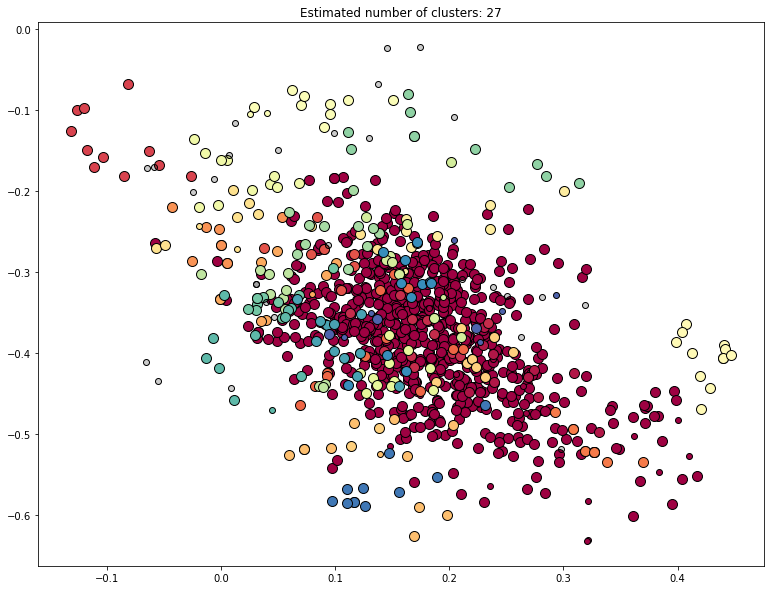

In [177]:
clst_dbscan_plot(X_5, labels_true, eps=1.5, min_samples=7)

In [ ]:
for eps in range(2,22):
    for min_samples in range(2, 5):
        clst_dbscan_plot(X_5, labels_true, eps=eps/10, min_samples=min_samples, plot=True)

In [ ]:
for eps in range(2,22):
    for min_samples in range(2, 5):
        clst_dbscan_plot(X_8, labels_true, eps=eps/10, min_samples=min_samples, plot=True)